# 目的

## 画像の読み込み・出力を行い，実際に画素ごとに処理を施す．

# 準備

In [ ]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive/')

# 目的の場所（フォルダ・ディレクトリ）へ移動（各自の環境で適宜修正）
%cd "/content/drive/MyDrive/Colab Notebooks/JKJ2B/day1"
%ls

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/JKJ2B/day1
 blue.png        green.png           mandrill_q1.jpg   red.png
 day1            mandrill.png        mono2.png         情報工学実験IIB資料_python.ipynb
'day1 _submit'   mandrill_q100.jpg   mono.png


#課題1-1　 画像の読み込み





*   横の画素数(width)
*   縦の画素数(height)
*   ピクセルあたりのバイト数(bpp: byte per pixel)
*   一枚の画像データサイズ(image size)


以上の画像情報表示させる






width =  512
height =  512
bpp =  3
image size =  786432


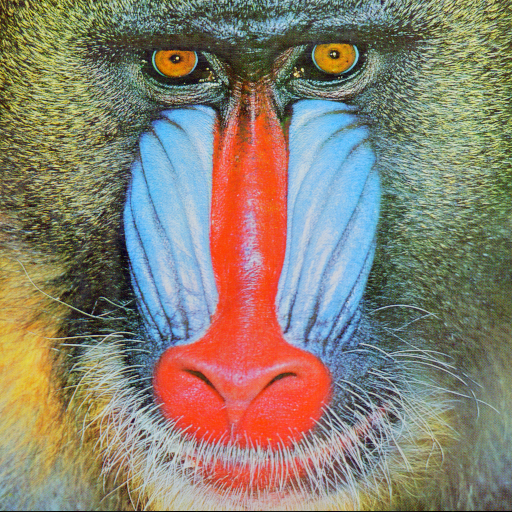

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

filename = 'mandrill.png'

# 画像の読み込み
image = cv2.imread(filename)


# 画像の幅，高さ，bpp（チャンネル数）を取得
width = image.shape[1]
height = image.shape[0]
bpp = image.shape[2] * image.dtype.type(0).nbytes
imagesize = image.nbytes

print('width = ', width)
print('height = ', height)
print('bpp = ', bpp)
print('image size = ', imagesize)

# 画像の表示
cv2_imshow(image)

# 課題1-2　　画素値の表示



横座標(x座標)，縦座標(y座標)をターミナルから入力して，その座標の画素値を表示する．

In [ ]:
h = int(input('height:'))
w = int(input('width'))

# B, G, Rの順番で並んでいるので注意してください
b = image[h, w, 0]
g = image[h, w, 1]
r = image[h, w, 2]

print('R:', r, ' G:', g, ' B: ', b)


height:300
width100
R: 47  G: 45  B:  38


# 課題1-3　　画像の統計量

人物画像やクロマキー画像を入力し，画像全体の画素に対してR，G，B値それぞれの平均値(ave)と標準偏差(std)を計算する．

In [ ]:
import statistics

width = image.shape[1]
height = image.shape[0]
all = width * height

b_list = []
g_list = []
r_list = []


for y in range(0, height):
  for x in range(0, width):
    b_list.append(image[y, x, 0])
    g_list.append(image[y, x, 1])
    r_list.append(image[y, x, 2])


b_ave = statistics.mean(b_list)
g_ave = statistics.mean(g_list)
r_ave = statistics.mean(r_list)


b_std = statistics.stdev(b_list)
g_std = statistics.stdev(g_list)
r_std = statistics.stdev(r_list)



print(' R_ave:', r_ave, '\n G_ave:', g_ave,'\n B_ave:', b_ave)

print('\n R_std:', r_std, '\n G_std:', g_std,'\n B_std: ', b_std)



/usr/lib/python3.10/statistics.py:714: RuntimeWarning: overflow encountered in long_scalars
  partials[diff_d * diff_d] += diff_n * diff_n


 R_ave: 137 
 G_ave: 128 
 B_ave: 113

 R_std: 3.0 
 G_std: 15.297058540778355 
 B_std:  14.933184523068078


# 課題1-5　　R,G,B各画像の出力

RGBカラー画像を入力して，R成分のみを残した画像(R画像)，G成分のみを残した画像(G画像)，B成分のみを残した画像(B画像)を出力する．


color: red


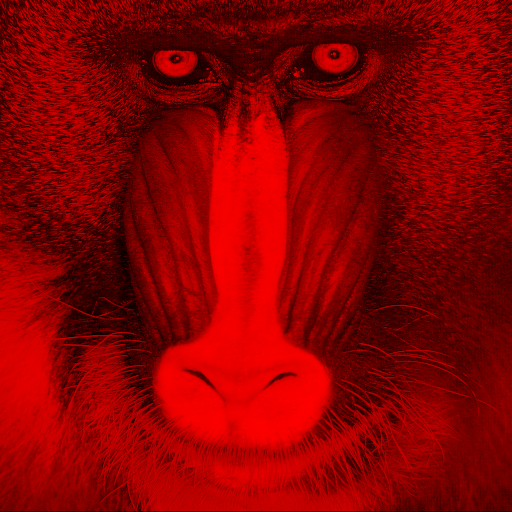

In [ ]:
image = cv2.imread('mandrill.png')

height = image.shape[0]
width = image.shape[1]

rgb = input('color: ')

color = {'blue':0, 'green':1, 'red':2}

for h in range(0, height):
  for w in range(0, width):
    for c in range(0, 3):
      if c == color[rgb]:
        continue
      image[h, w, c] = 0


# 画像の表示
cv2_imshow(image)

#課題1-6　モノクロ画像の出力

RGB画像を入力してモノクロ画像を出力する．


### 変換方法1

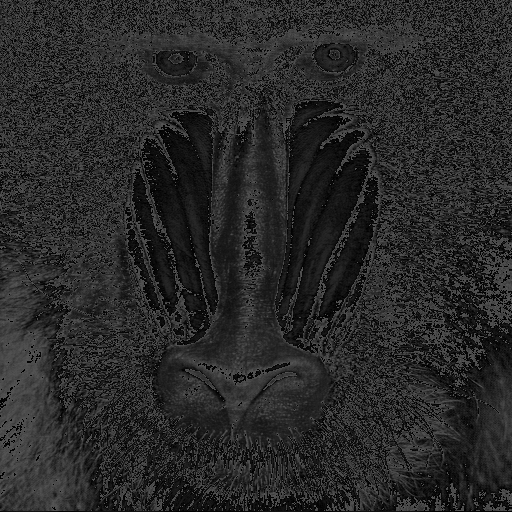

In [ ]:

image = cv2.imread('mandrill.png')

image_bgr = cv2.split(image)

image_b = (image_bgr[0] + image_bgr[1] + image_bgr[2]) / 3
image_g = (image_bgr[0] + image_bgr[1] + image_bgr[2]) / 3
image_r = (image_bgr[0] + image_bgr[1] + image_bgr[2]) / 3

image_mono = cv2.merge((image_b, image_g, image_r))


# 画像の表示
cv2_imshow(image_mono)


### 変換方法2

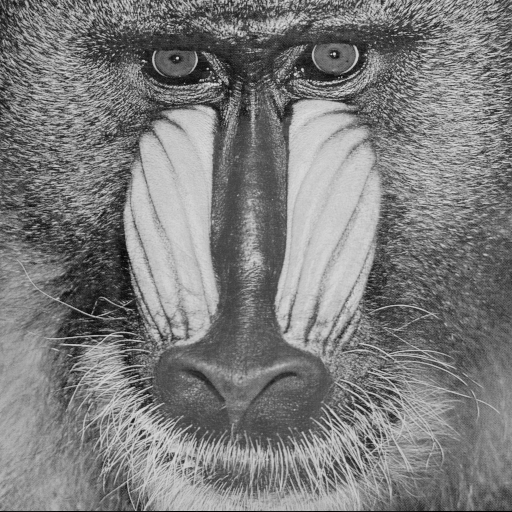

In [ ]:

image = cv2.imread('mandrill.png')

image_bgr = cv2.split(image)

image_b = 0.299 * image_bgr[0] + 0.587 * image_bgr[1] + 0.114 * image_bgr[2]
image_g = 0.299 * image_bgr[0] + 0.587 * image_bgr[1] + 0.114 * image_bgr[2]
image_r = 0.299 * image_bgr[0] + 0.587 * image_bgr[1] + 0.114 * image_bgr[2]

image_mono = cv2.merge((image_b, image_g, image_r))


# 画像の表示
cv2_imshow(image_mono)